## Topic modeling of EV Powertrain technologies and their patents from 1990-2018
Data collected on multiple powertrain technologies such as electric vehicle, hybrid electric vehicle, fuel cells vehicles and internal combusion engine(traditional vehicles) patent. We have made a text analysis on these technologies and performed topic modeling.

# 1) Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import nltk
import pandas as pd

In [4]:
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [33]:
# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

### Loading data

In [5]:
train = pd.read_csv('patent_ev.csv')

In [6]:
train.head()

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,...,num_citing_publn,citing_publn_date,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title
0,DE69118393A,14285742,1239277,2,0,0,WO9105114W,1991-08-07,1996-05-02,DE69118393D1,...,0,NaN,NaN,NaN,NaN,NaN,30,"ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL","ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL",ELEKTRISCHES ENERGIESYSTEM
1,DE69118393T,14285743,1239277,2,0,1,WO9105114W,1991-08-07,1996-09-05,DE69118393T2,...,2,2016-02-25\n2018-05-22,DE102014216372A1\nUS9975438B2,DE102014216372A\nUS201715436024A,449479509\n479351260,53836089\n53836089,30,"ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL","ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL",ELEKTRISCHES ENERGIESYSTEM
2,EP91915464A,16916549,1239277,2,0,1,WO9105114W,1991-08-07,1993-09-01\n1994-03-09\n1996-03-27,EP0557287A1\nEP0557287A4\nEP0557287B1,...,1,2007-12-25,US7313469B2,US51676105A,51497271,29718835,30,ELECTRIC FUEL (E.F.L.) LTD.,ELECTRIC FUEL (E.F.L.) LTD.,ELECTRICAL ENERGY SYSTEM
3,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,WO9303532A1,...,1,2002-07-11,WO0199222A3,WO0119827W,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM
4,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,US5121044A,...,44,1993-05-04\n1994-03-09\n1994-09-20\n1995-07-18...,US5208526A\nEP0557287A4\nUS5349535A\nUS5434020...,US63645090A\nEP91915464A\nUS96399792A\nUS15296...,52393850\n16916549\n54353461\n48212422\n457802...,27071024\n1239277\n25508001\n22545199\n2636904...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system


In [7]:
print(train.shape)

(23832, 32)


In [8]:
patent=train['appln_title']

In [9]:
patent[:3]

0    ELEKTRISCHES ENERGIESYSTEM
1    ELEKTRISCHES ENERGIESYSTEM
2      ELECTRICAL ENERGY SYSTEM
Name: appln_title, dtype: object

In [10]:
chars = list(set(patent)) 
data_size, vocab_size = len(patent), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

Patent data has chars 23832
Patent data has unique chars 16419


In [11]:
all_words = patent.str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the Patent dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

### using wordcloud

In [12]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

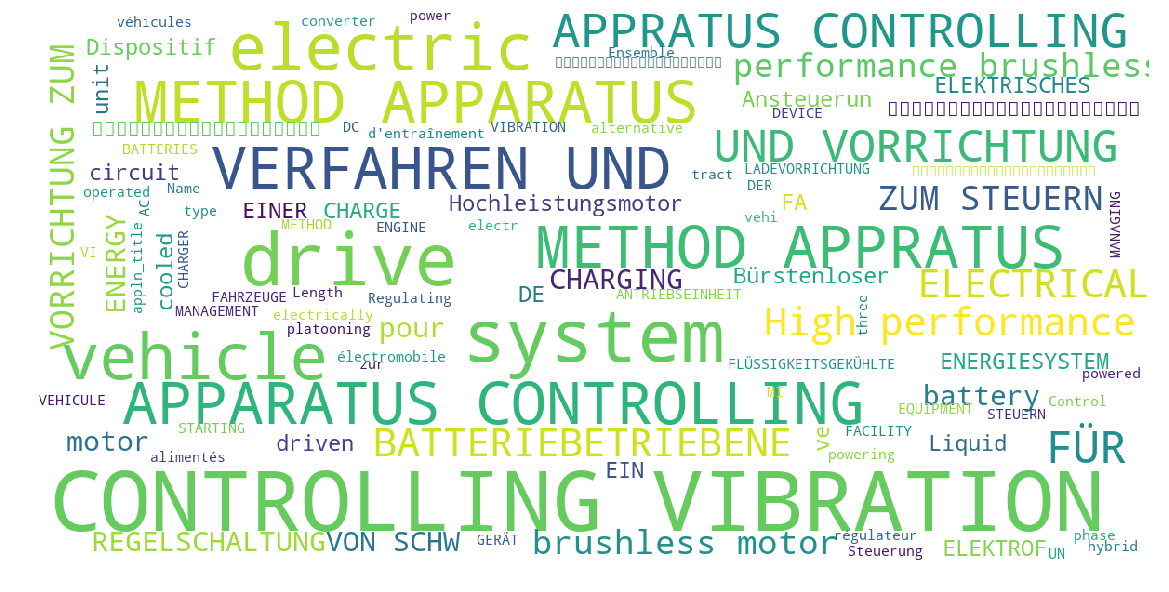

In [13]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(patent.dropna())

# 2. Cleaning and pre-processing data
Spoky stuff starts from here

### 2.1 Tokenization
The concept of tokenization is the act of taking a sequence of characters (think of Python strings) in a given document and dicing it up into its individual constituent pieces, which are the eponymous "tokens" of this method. One could loosely think of them as singular words in a sentence. One could naively implement the "split( )" method on a string which separates it into a python list based on the identifier in the argument. It is actually not that trivial to

Here we split the first sentence of the text in the training data just on a space as follows:

In [20]:
train['appln_title'][14]

'Control circuit for battery-driven electric vehicles'

In [17]:
# Storing the first text element as a string
first_text = train['appln_title'].values[0]
print(first_text)
print("="*90)
print(first_text.split(" "))

ELEKTRISCHES ENERGIESYSTEM
['ELEKTRISCHES', 'ENERGIESYSTEM']


In [22]:
first_text_14 = train['appln_title'].values[14]
print(first_text_14)
print("="*90)
print(first_text_14.split(" "))

Control circuit for battery-driven electric vehicles
['Control', 'circuit', 'for', 'battery-driven', 'electric', 'vehicles']


In [23]:
first_text_list = nltk.word_tokenize(first_text)
print(first_text_list)

['Control', 'circuit', 'for', 'battery-driven', 'electric', 'vehicles']


In [24]:
print(len(first_text_list))

6


### 2.2) Stopword Removal
As alluded to above stopwords are generally words that appear so commonly and at such a high frequency in the corpus that they don't actually contribute much to the learning or predictive process as a learning model would fail to distinguish it from other texts. Stopwordsinclude terms such as "to" or "the" and therefore, it would be to our benefit to remove them during the pre-processing phase. Conveniently, NLTK comes with a predefined list of 153 english stopwords.

In [25]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

179

In [26]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
# coming to our dataset
first_text_list_cleaned = [word for word in first_text_list if word.lower() not in stopwords]
print(first_text_list_cleaned)
print("="*90)
print("Length of original list: {0} words\n"
      "Length of list after stopwords removal: {1} words"
      .format(len(first_text_list), len(first_text_list_cleaned)))

['Control', 'circuit', 'battery-driven', 'electric', 'vehicles']
Length of original list: 6 words
Length of list after stopwords removal: 5 words


### 2.3) Stemming and Lemmatization

In [28]:
stemmer = nltk.stem.PorterStemmer()

In [29]:
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


However there is one flaw with stemming and that is the fact that the process involves quite a crude heuristic in chopping off the ends of words in the hope of reducing a particular word into a human recognizable base form. Therefore this process does not take into account vocabulary or word forms when collapsing words as this example will illustrate:

In [30]:
print("The stemmed form of leaves is: {}".format(stemmer.stem("leaves")))

The stemmed form of leaves is: leav


**Lemmatization to the rescue**

Therefore we turn to another that we could use in lieu of stemming. This method is called lemmatization which aims to achieve the same effect as the former method. However unlike a stemmer, lemmatizing the dataset aims to reduce words based on an actual dictionary or vocabulary (the Lemma) and therefore will not chop off words into stemmed forms that do not carry any lexical meaning. Here we can utilize NLTK once again to initialize a lemmatizer (WordNet variant) and inspect how it collapses words as follows

In [31]:
# with our data

from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
print("The lemmatized form of leaves is: {}".format(lemm.lemmatize("leaves")))

The lemmatized form of leaves is: leaf


### 2.4) Vectorizing Raw Text

In the vast collection of NLP literature, there are many different purposes for analyzing raw text, where in some cases you would like to compare the similarity of one body of text to another (Clustering techniques/Distance measurements), text classification as well as uncovering the topics that comprise a body of text (the aim of this notebook). With the purpose of uncovering topics at the back of our minds we must now think of how to feed the raw text into a machine learning model. Having already discussed tokenization, stopword removals and stemming (or maybe lemmatizing) we have now arrived at a reasonably cleaner text dataset then we started out with. However at this juncture, our raw text though human readable is still unfortunately not yet machine readable. A machine can read in bits and numbers and therefore we will first need to convert our text into numbers for which we utilise a very common approach known as the Bag-of-Words

**The Bag of Words approach**

This approach uses the counts of words as a starting block and records the occurrence of each word (from the entire text) in a vector specific to that particular word. For example given these two sentences "I love to eat Burgers", "I love to eat Fries", we first tokenize to obtain our vocabulary of 6 words from which we can get the word counts for - [I, love, to, eat, Burgers, Fries].

Vectorizing the text via the Bag of Words approach, we get six distinct vectors one for each word. So you ask since we now have rows consisting of numbers (instead of text) what forms the columns (or features)? Well each word now becomes an individual feature/column in this new transformed dataset. To illustrate this point, I shall utilize the Scikit-learn library to implement a vectorizer that generates a vector of word counts (term frequencies) - via the CountVectorizer method as follows.

In [34]:
# Defining our sentence
sentence = ["I love to eat Burgers", 
            "I love to eat Fries"]
vectorizer = CountVectorizer(min_df=0)
sentence_transform = vectorizer.fit_transform(sentence)

**Fitting the vectorizer to the dataset**

Here we initialize and create a simple term frequency object via the CountVectorizer function simply called "vectorizer". The parameters that I have provided explicitly (the rest are left as default) are the bare minimum. Here "min_df" in the parameter refers to the minimum document frequency and the vectorizer will simply drop all words that occur less than that value set (either integer or in fraction form).

Finally we apply the fit_transform method is actually comprised of two steps. The first step is the fit method where the vectorizer is mapped to the the dataset that you provide. Once this is done, the actual vectorizing operation is performed via the transform method where the raw text is turned into its vector form as shown below:

In [35]:
print("The features are:\n {}".format(vectorizer.get_feature_names()))
print("\nThe vectorized array looks like:\n {}".format(sentence_transform.toarray()))

The features are:
 ['burgers', 'eat', 'fries', 'love', 'to']

The vectorized array looks like:
 [[1 1 0 1 1]
 [0 1 1 1 1]]


In [36]:
sentence_transform

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

**Sparse matrix vector ouptuts**

From the output of the vectorized text, we can see that the features consist of the words in the corpus of text that we fed into the vectorizer (here the corpus being the two sentences we defined earlier). Simply call the get_feature_names attribute from the vectorizer to inspect it.

With regards to the transformed text, one would be tempted to inspect the values by simplying calling it. However when you try to call it you really just get a message which states "sparse matrix of type class 'numpy.int64' with 8 stored elements in Compressed Sparse Row format". Therefore this means that the vectorizer returns the transformed raw text as a matrix where most of its values are zero or almost negligible, hence the term sparse. Thinking about this, it does make sense that our returned matrices contain quite a high degree of sparsity due to

In [37]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

### 2.5) Putting all the preprocessing steps together
Tokenization, stopword removals, stemming/lemmatizing

Thankfully we do not need to go through all of that again. I conveniently omitted a key detail about Sklearn vectorizers but will mention it at this juncture. When you vectorize the raw text with CountVectorizer, the dual stages of tokenizing and stopwords filtering are automatically included as a high-level component. Here unlike the NLTK tokenizer that you were introduced to in the Section 2 earlier, Sklearn's tokenizer discards all single character terms like ('a', 'w' etc) and also lower cases all terms by default. Filtering out stopwords in Sklearn is as convenient as passing the value 'english' into the argument "stop_words" where a built-in English stopword list is automatically used.

Unfortunately, there is no built-in lemmatizer in the vectorizer so we are left with a couple of options. Either implementing it separately everytime before feeding the data for vectorizing or somehow extend the sklearn implementation to include this functionality. Luckily for us, we have the latter option where we can extend the CountVectorizer class by overwriting the "build_analyzer" method as follows:

In [38]:
# Extending the CountVectorizer class with a lemmatizer
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

We have essentially inherited and subclassed the original Sklearn's CountVectorizer class and overwritten the build_analyzer method by implementing the lemmatizer for each list in the raw text matrix.

### 2.6) TF-IDF

In [39]:
# using tf-idf with all cleaning pre-processing 
# Storing the entire training text in a list
text = list(train.appln_title.values)

In [40]:
text[0:5]

['ELEKTRISCHES ENERGIESYSTEM',
 'ELEKTRISCHES ENERGIESYSTEM',
 'ELECTRICAL ENERGY SYSTEM',
 'ELECTRICAL ENERGY SYSTEM',
 'Electrical energy system']

In [41]:
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

### 2.7) Revisiting our Term frequencies

In [42]:
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')


# 3) Topic modelling-LDA

I will implement  topic modelling technique named as LDA:

**Latent Dirichlet Allocation** - Probabilistic, generative model which uncovers the topics latent to a dataset by assigning weights to words in a corpus, where each topic will assign different probability weights to each word.


In [43]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [44]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=11, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

### Topics generated by LDA

In [45]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:energy storage wireless current range cable management electronic para electrical intelligent start facility ev extended alternating time carga veículo quick terminal heat sistema elétrico double feeding direct extender prediction um saving balancing dispositivo real alignment signal extending increase particular método

Topic #1:electric vehicle charging battery power automobile device supply station controller structure management pack charger electrically driven electrical plug module unit powered connector communication equipment safety source connection integrated monitoring discharge thermal service low box function protection network driver use mounted

Topic #2:providing saddle et form identification garage transport mean en operated stereo shorted material configuration design bicycle og regulating handle security 제어 전기 quantity acceleration scheduling balance 하이브리드 elektrisk 구동 wiring til pedal ladesystem riding home pick rider electriques str

### further analysis of Topics

In [50]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

In [52]:
first_topic.shape

(3615,)

### Word Cloud visualizations of the topics

In [53]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

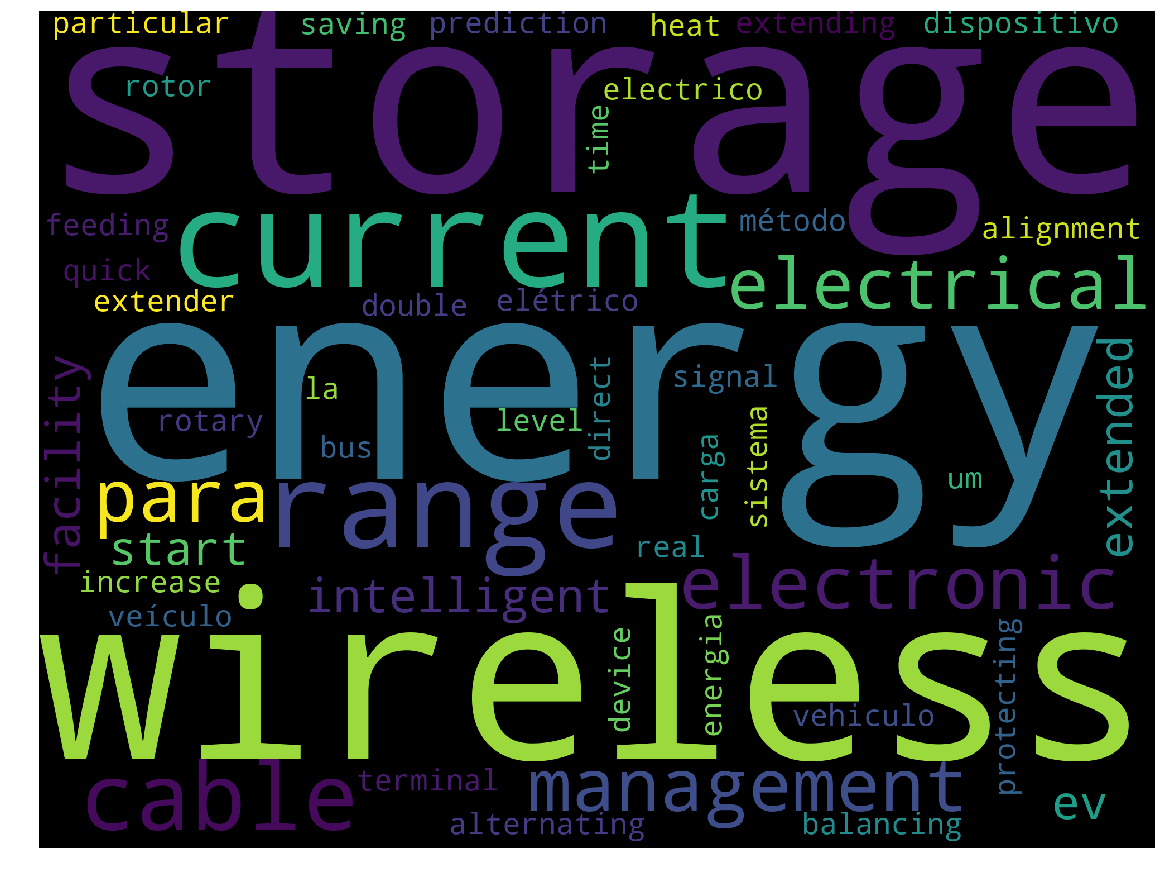

In [55]:
# Generating the wordcloud with the values under the category dataframe
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words)) # notice here
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

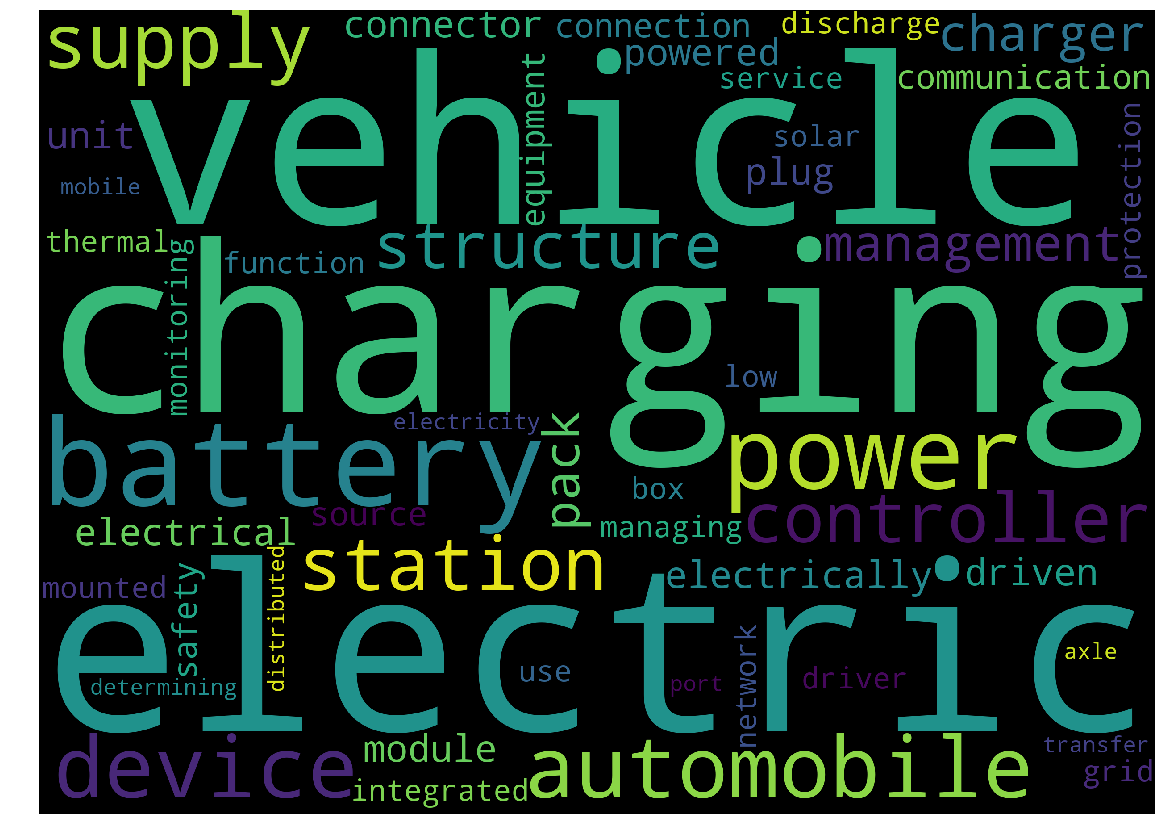

In [56]:
# Generating the wordcloud with the values under the category dataframe
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words)) # notice here
plt.imshow(cloud)
plt.axis('off')
plt.show()

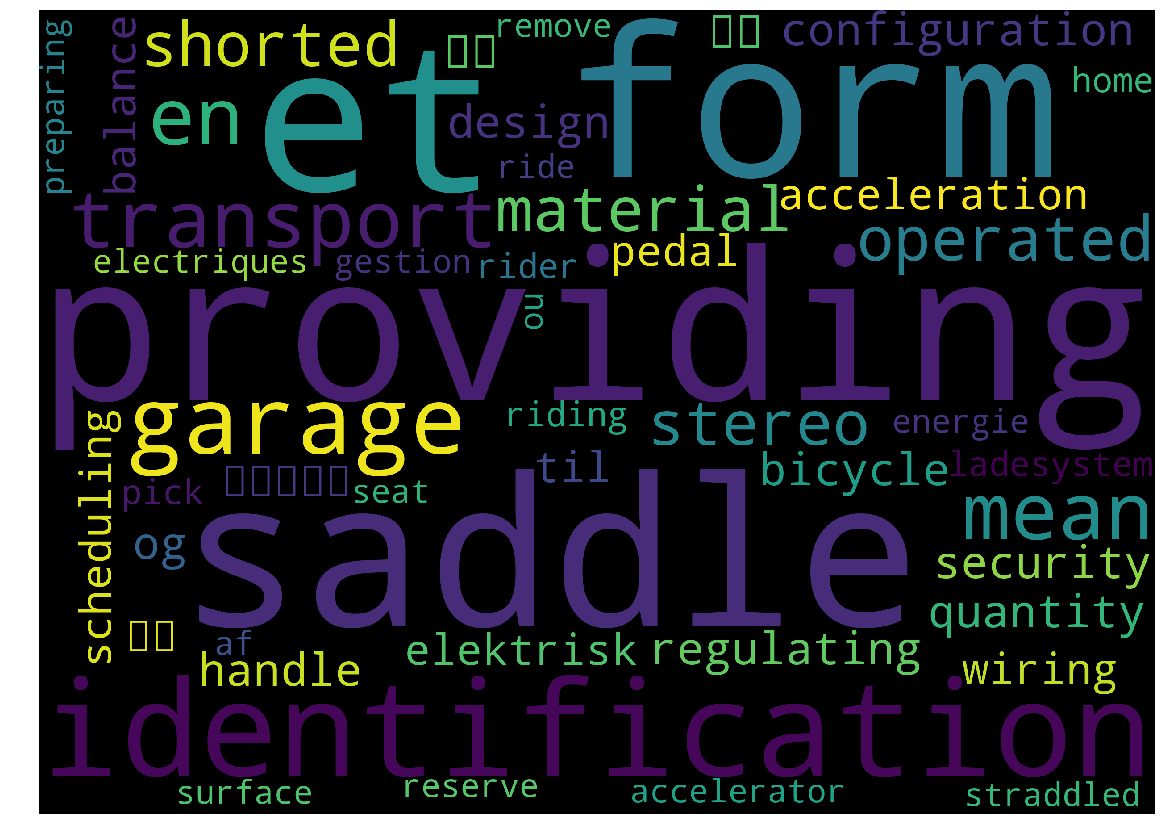

In [57]:
# Generating the wordcloud with the values under the category dataframe
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

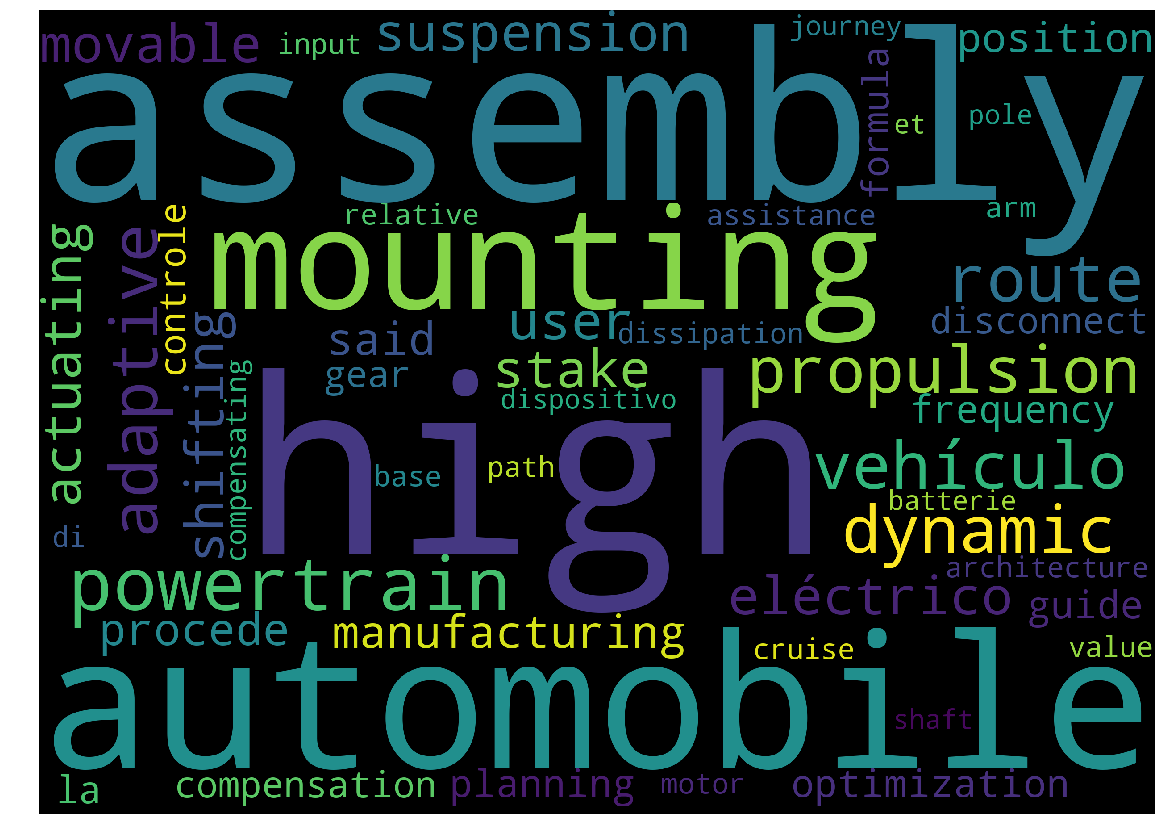

In [58]:
# Generating the wordcloud with the values under the category dataframe
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(fourth_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()